In [1]:
#Load libaries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np 
from pandas.plotting import scatter_matrix

#Load datasets
data_white = pd.read_csv('dataset_WineQuality-White.csv')
#data_red = pd.read_csv('dataset_WineQuality-Red.csv')
#data_red
data_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [2]:
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [3]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Note: skewness

Skewness, in statistics, is the degree of distortion from the symmetrical bell curve in a probability distribution. Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. Data lean to the left is positive vs. lean to the right is negative

In [4]:
data_white.skew(axis = 0) 

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

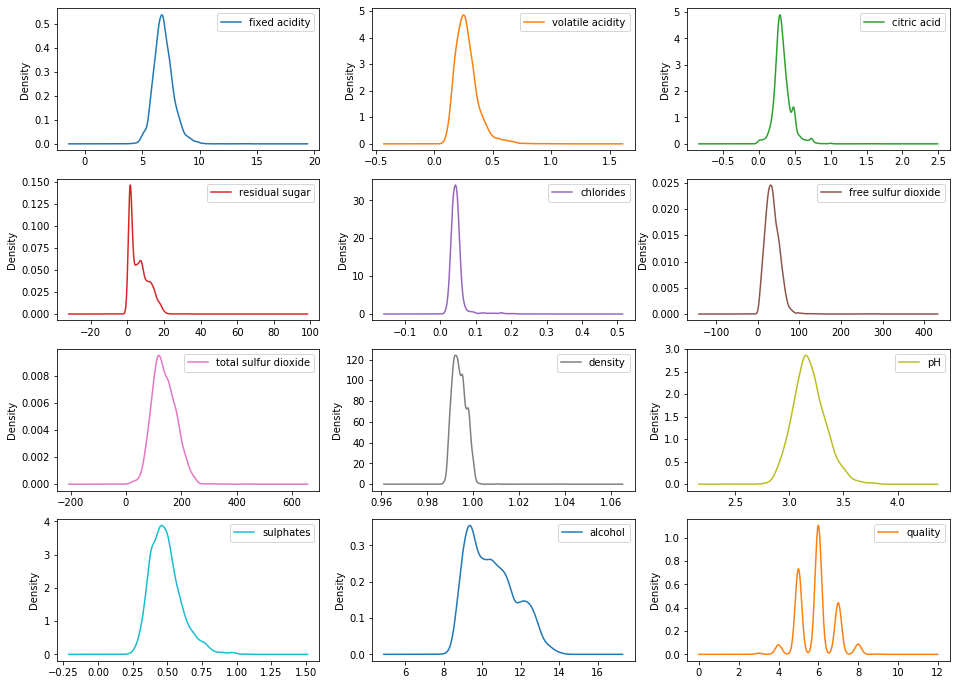

In [5]:
# Density
data_white.plot(kind='density', subplots=True, layout=(4,3),figsize=(16, 12), sharex=False)
plt.show()

Note: Correlation

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the ‘quality’ value tends to go up when the ‘alcohol’ goes up. When the coefficient is close to –1, it means that there is a strong negative correlation. Finally, coefficients close to zero mean that there is no linear correlation.

In [6]:
data_white.corr() #return correlation between columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


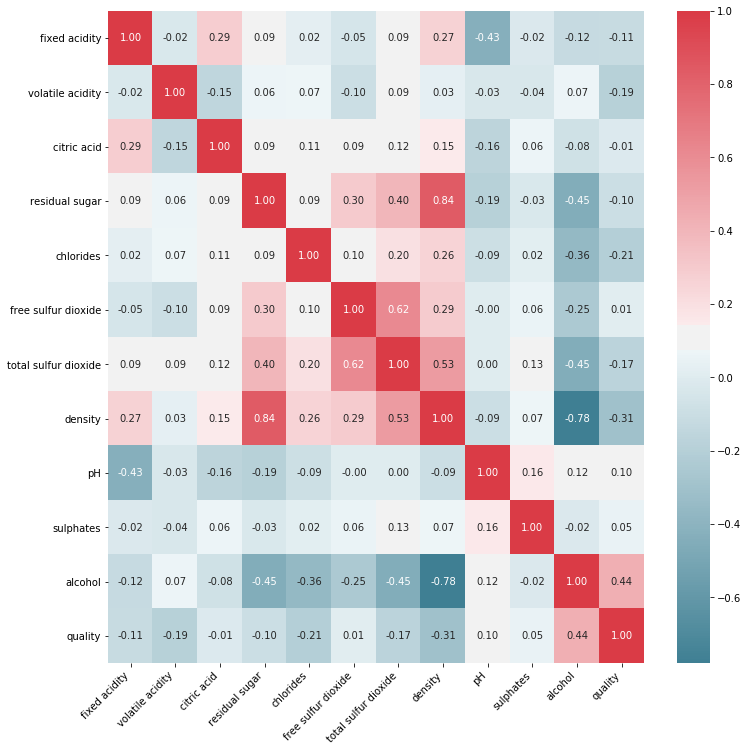

In [7]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# Correlation matrix
correlations = data_white.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(12, 12))
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colum_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.show()

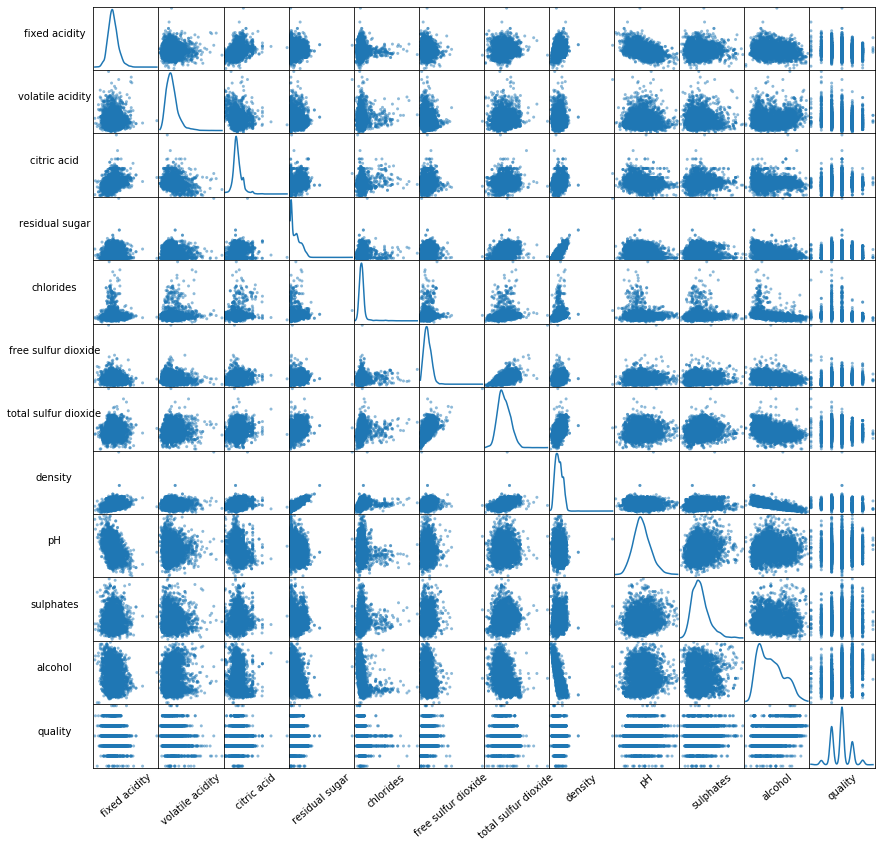

In [8]:
# Scatterplot Matrix
sm = scatter_matrix(data_white, figsize=(14, 14), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

In [9]:
data_white.cov() #return co-variance betweent columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.712114,-0.001931,0.029533,0.381022,0.000426,-0.708919,3.266013,0.000670,-0.054265,-0.001651,-0.125533,-0.084947
volatile acidity,-0.001931,0.010160,-0.001823,0.032865,0.000155,-0.166300,0.382354,0.000008,-0.000486,-0.000411,0.008400,-0.017382
citric acid,0.029533,-0.001823,0.014646,0.057829,0.000302,0.193630,0.622989,0.000054,-0.002992,0.000861,-0.011278,-0.000987
residual sugar,0.381022,0.032865,0.057829,25.725770,0.009828,25.800578,86.531303,0.012727,-0.148684,-0.015435,-2.812740,-0.438316
chlorides,0.000426,0.000155,0.000302,0.009828,0.000477,0.037674,0.184687,0.000017,-0.000298,0.000042,-0.009684,-0.004062
free sulfur dioxide,-0.708919,-0.166300,0.193630,25.800578,0.037674,289.242720,444.865891,0.014966,-0.001587,0.114938,-5.234509,0.122878
total sulfur dioxide,3.266013,0.382354,0.622989,86.531303,0.184687,444.865891,1806.085491,0.067352,0.014894,0.652645,-23.476605,-6.576746
density,0.000670,0.000008,0.000054,0.012727,0.000017,0.014966,0.067352,0.000009,-0.000042,0.000025,-0.002871,-0.000814
pH,-0.054265,-0.000486,-0.002992,-0.148684,-0.000298,-0.001587,0.014894,-0.000042,0.022801,0.002688,0.022565,0.013297
sulphates,-0.001651,-0.000411,0.000861,-0.015435,0.000042,0.114938,0.652645,0.000025,0.002688,0.013025,-0.002448,0.005425
